** Notebook - Run SQL Queries for EDA, Data Visualization and Modeling ** <br>
Dataset: Wyoming Oil and Gas Conservation Commission


Importing the basic modules <br>
Data Analysis Library: Pandas, https://pandas.pydata.org/
Visualization Library: Matplotlib, https://matplotlib.org/

In [1]:
import sqlite3                    
import pandas as pd
import numpy as np       
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
#plt.rcdefaults()

In order to access the database components, we need to open the connection to the .sqlite file and use the cursor

In [2]:
conn = sqlite3.connect(r'C:\Users\ayush\Desktop\WOGCC\PowderRivercsv\PowderDb.sqlite')
cur = conn.cursor()

Now we need to bring the entire table into Pandas dataframe, so we can run SQL queries and obtain the desired part of data

- https://sqlite.org/docs.html
- https://sqlite.org/optoverview.html

In [3]:
# SQL Query - Entire data from database converted to a dataframe
data = pd.read_sql_query(''' SELECT * FROM Production;''', conn)
print(data.head(10))
print (data.shape)

index_data = data.index
print(index_data)
col = data.columns
print(col)

    Apino                 Wellname  County                       Company  \
0  305030  SPENCE DOME B-019946 14       3           ENDEAVOR ENERGY LLC   
1  305036                COZZENS 4       3          MERIT ENERGY COMPANY   
2  305037                COZZENS 3       3          MARATHON OIL COMPANY   
3  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
4  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
5  305058           AJAX 0-11185 3       3     WASHAKIE ENERGIES COMPANY   
6  305061        WY State 0-3593 1       3  LEGACY RESERVES OPERATING LP   
7  305062                   AJAX 2       3     WASHAKIE ENERGIES COMPANY   
8  305063                 MENGER 3       3  LEGACY RESERVES OPERATING LP   
9  305072           STATE 0-4198 2       3  LEGACY RESERVES OPERATING LP   

    Field_Name Horiz_Dir  Sec  Twp T_Dir  Rge    ...     Gravity03 Gravity04  \
0  SPENCE DOME         N    9   54     N   94    ...          19.0      20.0   
1  

In [5]:
data['Sum'] =  data[['Jan_oil', 'Feb_oil', 'Mar_oil', 'Apr_oil', 'May_oil', 'Jun_oil', 'Jul_oil', 'Aug_oil', 'Sep_oil',
                       'Oct_oil', 'Nov_oil', 'Dec_oil']].sum(axis=1)
data = data.sort_values(by=['Sum'], ascending = False)
data.head() # will show top 5 results

data_top25 = data.iloc[0:25] #Selecting the top 25 rows of the dataframe

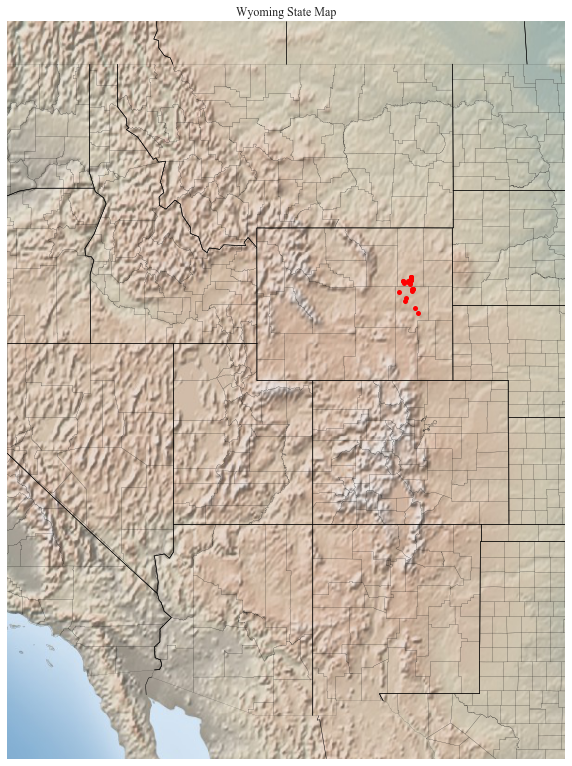

In [6]:
# Install using this command -> conda install -c conda-forge basemap
from mpl_toolkits.basemap import Basemap
lon = data_top25.Lon.values # remove the index column
lat = data_top25.Lat.values # remove the index column

plt.figure(figsize=(10,15))
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,\
            llcrnrlon=-120,urcrnrlon=-100,lat_ts=20,resolution='l')

m.shadedrelief()
m.drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, zorder=None, drawbounds=False)
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

#m.readshapefile(shapefile=r'C:\Users\ayush\Desktop\WOGCC\WY Shape Files\tl_2013_56_cousub',name = m)

plt.title("Wyoming State Map",fontname="Times New Roman",fontweight="bold")

x,y = m(lon, lat)           
m.plot(x,y, 'ro', markersize=5, alpha=1, zorder=1)
plt.show()

Text(0,0.5,'Production')

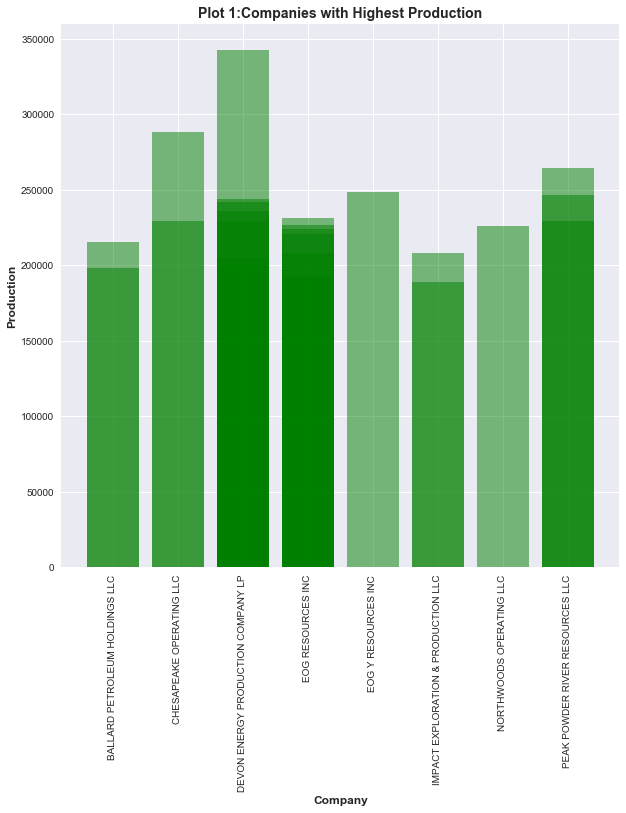

In [8]:
x = np.arange(len(data_top25['Company']))
fig, ax = plt.subplots()
axes = plt.gca()
fig.set_size_inches(10, 10)
plt.xticks(x, rotation=90)
plt.bar(data_top25.Company,data_top25.Sum, align='center', alpha=0.5, color = 'g')
ax.set_title('Plot 1:Companies with Highest Production', fontsize=14, fontweight='bold')
ax.set_xlabel('Company', fontsize = 12, fontweight='bold')
ax.set_ylabel('Production', fontsize = 12, fontweight='bold')

In [9]:
#Query to sum the monthly production

data2 = pd.read_sql_query('''
            SELECT Yr, Sum(Jan_oil), Sum(Feb_oil), Sum(Mar_oil), Sum(Apr_oil), Sum(May_oil), Sum(Jun_oil), 
            Sum(Jul_oil), Sum(Aug_oil), Sum(Sep_oil), Sum(Oct_oil), Sum(Nov_oil), Sum(Dec_oil)
            FROM Production
            GROUP BY Yr
            ;''', conn)
data2

,Yr,Sum(Jan_oil),Sum(Feb_oil),Sum(Mar_oil),Sum(Apr_oil),Sum(May_oil),Sum(Jun_oil),Sum(Jul_oil),Sum(Aug_oil),Sum(Sep_oil),Sum(Oct_oil),Sum(Nov_oil),Sum(Dec_oil)
0,2007,1326239,1188124,1322765,1304627,1320825,1278971,1300917,1307869,1273269,1310847,1264613,1251896
1,2008,1237382,1180513,1257333,1222345,1224562,1197665,1236779,1239532,1194034,1230154,1196601,1178102
2,2009,1194257,1097554,1145185,1126514,1179618,1118256,1142731,1156972,1132562,1173762,1160225,1114585
3,2010,1155913,1074388,1226175,1166295,1212212,1207464,1257135,1257911,1258566,1285737,1207490,1270039
4,2011,1234705,1154633,1321643,1327889,1366076,1340407,1381504,1362753,1329055,1418733,1423912,1536782
5,2012,1503088,1476358,1600834,1476911,1556794,1492375,1695403,1725623,1675016,1715639,1751866,1837627
6,2013,1840302,1784481,2095033,2000760,2166897,2125338,2051077,2348964,2356994,2352993,2406536,2340212
7,2014,2509743,2320644,2743999,2746090,2971616,3005564,3134516,3363402,3337196,3642045,3353902,3698856
8,2015,3837345,3531656,4171639,4160283,4107121,3823593,3894225,3839443,3583268,3733573,3580201,3680590
9,2016,3433903,3096883,3215977,2952157,2893941,2686663,2868696,2786737,2584337,2757465,2613300,2502541


In [10]:
data2 = data2[data2.Yr != 2018]

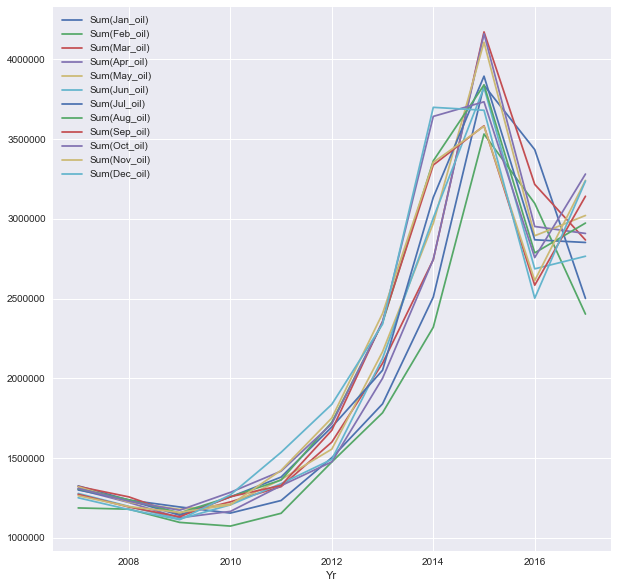

In [11]:
data2.set_index('Yr').plot(figsize=(10,10), grid=True)

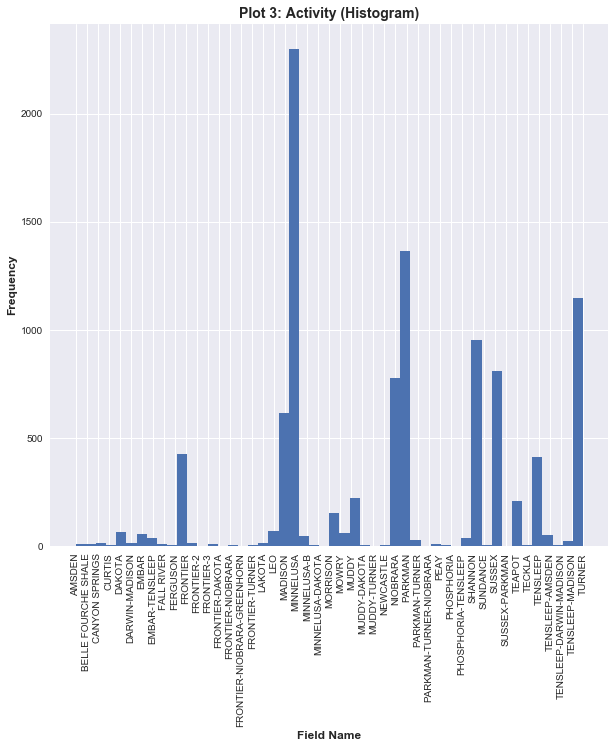

In [12]:
fig, ax = plt.subplots()                                    
fig.set_size_inches(10, 10)                                  
fig.subplots_adjust(top=0.85)
ax.set_title('Plot 3: Activity (Histogram)', fontsize=14, fontweight='bold')
ax.set_xlabel('Field Name', fontsize = 12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize = 12, fontweight='bold')
plt.grid(True)
plt.xticks(rotation=90)

ax.hist(data[:10000]['Formation'], bins = 50)            #Set the Histogram paramaters
plt.show()